In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

!ls -la /content/drive/MyDrive/Project
!ls -la /content/drive/MyDrive/Project/FCSR-GAN

Mounted at /content/drive
total 4
drwx------ 2 root root 4096 Sep 14 19:33 FCSR-GAN
total 59
-rw------- 1 root root  1630 Sep 13 09:05 attention.py
drwx------ 2 root root  4096 Sep 14 19:33 celeba_dataset
drwx------ 2 root root  4096 Sep 14 19:33 checkpoints
drwx------ 2 root root  4096 Sep 14 19:33 data
-rw------- 1 root root  1557 Sep 14 19:10 identity_loss.py
drwx------ 2 root root  4096 Sep 14 19:33 img
-rw------- 1 root root 11347 Nov 14  2019 LICENSE
-rw------- 1 root root   680 Sep 14 19:10 loss.py
drwx------ 2 root root  4096 Sep 14 19:33 models
drwx------ 2 root root  4096 Sep 14 19:33 options
drwx------ 2 root root  4096 Sep 14 19:33 __pycache__
-rw------- 1 root root  1542 Nov 14  2019 README.md
-rw------- 1 root root  8213 Nov 14  2019 train_gan.py
drwx------ 2 root root  4096 Sep 14 19:33 utils


In [2]:
%cd /content/drive/MyDrive/Project/FCSR-GAN
!pwd

/content/drive/MyDrive/Project/FCSR-GAN
/content/drive/MyDrive/Project/FCSR-GAN


In [3]:
!ls -la /content/drive/MyDrive/Project/FCSR-GAN

total 59
-rw------- 1 root root  1630 Sep 13 09:05 attention.py
drwx------ 2 root root  4096 Sep 14 19:33 celeba_dataset
drwx------ 2 root root  4096 Sep 14 19:33 checkpoints
drwx------ 2 root root  4096 Sep 14 19:33 data
-rw------- 1 root root  1557 Sep 14 19:10 identity_loss.py
drwx------ 2 root root  4096 Sep 14 19:33 img
-rw------- 1 root root 11347 Nov 14  2019 LICENSE
-rw------- 1 root root   680 Sep 14 19:10 loss.py
drwx------ 2 root root  4096 Sep 14 19:33 models
drwx------ 2 root root  4096 Sep 14 19:33 options
drwx------ 2 root root  4096 Sep 14 19:33 __pycache__
-rw------- 1 root root  1542 Nov 14  2019 README.md
-rw------- 1 root root  8213 Nov 14  2019 train_gan.py
drwx------ 2 root root  4096 Sep 14 19:33 utils


In [4]:
from attention import MultiScaleSpatialChannelAttention
attention = MultiScaleSpatialChannelAttention(in_channels=64)
print("Attention module loaded!")

Attention module loaded!


In [5]:
from google.colab import drive
import os
drive.mount('/content/drive')
project_dir = '/content/drive/MyDrive/Project'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
fcsr_dir = os.path.join(project_dir, 'FCSR-GAN')
dataset_dir = os.path.join(project_dir, 'celeba_dataset')
img_dir = os.path.join(dataset_dir, 'img_align_celeba')

In [7]:
processed_dir = os.path.join(dataset_dir, 'processed_occluded')
checkpoint_dir = os.path.join(project_dir, 'checkpoints')
os.makedirs(checkpoint_dir, exist_ok=True)



In [8]:
# Install dependencies
!pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 -f https://download.pytorch.org/whl/torch_stable.html
!pip install insightface onnxruntime opencv-python pillow numpy scikit-image

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.13.1+cu116 (from versions: 2.2.0, 2.2.0+cpu, 2.2.0+cpu.cxx11.abi, 2.2.0+cu118, 2.2.0+cu121, 2.2.0+rocm5.6, 2.2.0+rocm5.7, 2.2.1, 2.2.1+cpu, 2.2.1+cpu.cxx11.abi, 2.2.1+cu118, 2.2.1+cu121, 2.2.1+rocm5.6, 2.2.1+rocm5.7, 2.2.2, 2.2.2+cpu, 2.2.2+cpu.cxx11.abi, 2.2.2+cu118, 2.2.2+cu121, 2.2.2+rocm5.6, 2.2.2+rocm5.7, 2.3.0, 2.3.0+cpu, 2.3.0+cpu.cxx11.abi, 2.3.0+cu118, 2.3.0+cu121, 2.3.0+rocm5.7, 2.3.0+rocm6.0, 2.3.1, 2.3.1+cpu, 2.3.1+cpu.cxx11.abi, 2.3.1+cu118, 2.3.1+cu121, 2.3.1+rocm5.7, 2.3.1+rocm6.0, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0)
ERROR: No matching distribution found for torch==1.13.1+cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 13.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━

In [9]:

!find /content/drive/MyDrive/Project -name "img_align_celeba"
!find /content/drive/MyDrive/Project -name "*.jpg" | head -5

/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/img_align_celeba
/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/test/lena.jpg
/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/img_align_celeba/000002.jpg
/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/img_align_celeba/000003.jpg
/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/img_align_celeba/000001.jpg
/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/img_align_celeba/000023.jpg


In [10]:
img_dir = '/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/img_align_celeba'
!ls -la {img_dir} | head -5
print("Total images:", len(os.listdir(img_dir)) if os.path.exists(img_dir) else "Directory not found")

total 1497
-rw------- 1 root root 11440 Sep 28  2015 000001.jpg
-rw------- 1 root root  7448 Sep 28  2015 000002.jpg
-rw------- 1 root root  4253 Sep 28  2015 000003.jpg
-rw------- 1 root root 10747 Sep 28  2015 000004.jpg
Total images: 207


In [11]:
# Verify folders
print("Checking FCSR-GAN folder:")
!ls -la {fcsr_dir}
print("\nChecking CelebA images:")
!ls -la {img_dir} | head -5
print("\nTotal images:", len(os.listdir(img_dir)))

# Verify one image
import cv2
sample_img = cv2.imread(os.path.join(img_dir, '000001.jpg'))
print(f"Sample image shape: {sample_img.shape if sample_img is not None else 'Not found'}")

Checking FCSR-GAN folder:
total 59
-rw------- 1 root root  1630 Sep 13 09:05 attention.py
drwx------ 5 root root  4096 Sep 14 19:33 celeba_dataset
drwx------ 2 root root  4096 Sep 14 19:33 checkpoints
drwx------ 3 root root  4096 Sep 14 19:33 data
-rw------- 1 root root  1557 Sep 14 19:10 identity_loss.py
drwx------ 2 root root  4096 Sep 14 19:33 img
-rw------- 1 root root 11347 Nov 14  2019 LICENSE
-rw------- 1 root root   680 Sep 14 19:10 loss.py
drwx------ 4 root root  4096 Sep 14 19:33 models
drwx------ 3 root root  4096 Sep 14 19:33 options
drwx------ 2 root root  4096 Sep 14 19:33 __pycache__
-rw------- 1 root root  1542 Nov 14  2019 README.md
-rw------- 1 root root  8213 Nov 14  2019 train_gan.py
drwx------ 3 root root  4096 Sep 14 19:33 utils

Checking CelebA images:
total 1497
-rw------- 1 root root 11440 Sep 28  2015 000001.jpg
-rw------- 1 root root  7448 Sep 28  2015 000002.jpg
-rw------- 1 root root  4253 Sep 28  2015 000003.jpg
-rw------- 1 root root 10747 Sep 28  2015 00

In [12]:

fcsr_dir = '/content/drive/MyDrive/Project/FCSR-GAN'


def create_support_files(fcsr_dir):
    if not os.path.exists(os.path.join(fcsr_dir, 'attention.py')):
        attention_code = """
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiScaleSpatialChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super().__init__()
        self.in_channels = in_channels
        self.ca_avg = nn.AdaptiveAvgPool2d(1)
        self.ca_max = nn.AdaptiveMaxPool2d(1)
        self.ca_fc = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels // reduction, in_channels, 1, bias=False)
        )
        self.ca_sigmoid = nn.Sigmoid()
        self.sa_conv1 = nn.Conv2d(2, 1, kernel_size=3, padding=1)
        self.sa_conv2 = nn.Conv2d(2, 1, kernel_size=5, padding=2)
        self.sa_conv3 = nn.Conv2d(2, 1, kernel_size=7, padding=3)
        self.sa_sigmoid = nn.Sigmoid()

    def forward(self, x):
        b, c, h, w = x.size()
        avg_out = self.ca_avg(x)
        max_out = self.ca_max(x)
        ca_out = self.ca_fc(avg_out) + self.ca_fc(max_out)
        ca_out = self.ca_sigmoid(ca_out)
        x_ca = x * ca_out
        avg_sa = torch.mean(x_ca, dim=1, keepdim=True)
        max_sa = torch.max(x_ca, dim=1, keepdim=True)[0]
        sa_in = torch.cat([avg_sa, max_sa], dim=1)
        sa1 = self.sa_sigmoid(self.sa_conv1(sa_in))
        sa2 = self.sa_sigmoid(self.sa_conv2(sa_in))
        sa3 = self.sa_sigmoid(self.sa_conv3(sa_in))
        sa_out = (sa1 + sa2 + sa3) / 3
        x_out = x_ca * sa_out
        return x_out
"""
        with open(os.path.join(fcsr_dir, 'attention.py'), 'w') as f:
            f.write(attention_code)

    identity_loss_code = """
import torch
import torch.nn as nn
import numpy as np
from insightface.app import FaceAnalysis

class IdentityPreservingLoss(nn.Module):
    def __init__(self, device='cuda'):
        super().__init__()
        self.device = device
        self.app = FaceAnalysis(providers=['CPUExecutionProvider'])  # use CPU if CUDA not available
        self.app.prepare(ctx_id=0, det_size=(640, 640))
        self.criterion = nn.CosineSimilarity(dim=1)

    def forward(self, recon_img, gt_img):
        recon_emb = []
        gt_emb = []

        for img in recon_img:
            img_np = (img.detach().cpu().numpy().transpose(1,2,0) * 255).astype(np.uint8)
            faces = self.app.get(img_np)
            embedding = faces[0].embedding if len(faces) > 0 else torch.zeros(512).to(self.device)
            if not isinstance(embedding, torch.Tensor):
                embedding = torch.tensor(embedding, dtype=torch.float32).to(self.device)
            recon_emb.append(embedding)

        for img in gt_img:
            img_np = (img.detach().cpu().numpy().transpose(1,2,0) * 255).astype(np.uint8)
            faces = self.app.get(img_np)
            embedding = faces[0].embedding if len(faces) > 0 else torch.zeros(512).to(self.device)
            if not isinstance(embedding, torch.Tensor):
                embedding = torch.tensor(embedding, dtype=torch.float32).to(self.device)
            gt_emb.append(embedding)

        recon_emb = torch.stack(recon_emb)
        gt_emb = torch.stack(gt_emb)

        return 1 - self.criterion(recon_emb, gt_emb).mean()

"""
    with open(os.path.join(fcsr_dir, 'identity_loss.py'), 'w') as f:
        f.write(identity_loss_code)

    loss_code = """
import torch
import torch.nn as nn
import torch.nn.functional as F

def occlusion_aware_l1(fake, real, mask):
    # Upsample fake to match real size if needed
    if fake.shape[2:] != real.shape[2:]:
        fake = F.interpolate(fake, size=real.shape[2:], mode='bilinear', align_corners=False)

    # Resize mask to match real
    mask_resized = F.interpolate(mask, size=real.shape[2:], mode='nearest')
    mask_resized = mask_resized.repeat(1, real.shape[1], 1, 1)  # repeat for channels

    # Compute weighted L1 loss
    weights = torch.ones_like(real)
    weights[mask_resized == 1] = 5.0
    weighted_diff = torch.abs(fake - real) * weights
    return weighted_diff.mean()
"""

    with open(os.path.join(fcsr_dir, 'loss.py'), 'w') as f:
        f.write(loss_code)

create_support_files(fcsr_dir)
print("Created files:")
!ls -la {fcsr_dir} | grep -E 'attention.py|identity_loss.py|loss.py'

# Test attention import
from attention import MultiScaleSpatialChannelAttention
print("Attention module loaded successfully!")

Created files:
-rw------- 1 root root  1630 Sep 13 09:05 attention.py
-rw------- 1 root root  1557 Sep 14 19:45 identity_loss.py
-rw------- 1 root root   680 Sep 14 19:45 loss.py
Attention module loaded successfully!


In [13]:
import cv2
import numpy as np
import os

# Paths
img_dir = '/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/img_align_celeba'
processed_dir = '/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/processed_occluded'

# Preprocess function
def preprocess_celeba(img_dir, processed_dir, num_samples=207):
    os.makedirs(os.path.join(processed_dir, 'low_res_occluded'), exist_ok=True)
    os.makedirs(os.path.join(processed_dir, 'masks'), exist_ok=True)
    os.makedirs(os.path.join(processed_dir, 'gt_high_res'), exist_ok=True)

    if not os.path.exists(img_dir):
        raise FileNotFoundError(f"CelebA images not found at {img_dir}. Run `!find /content/drive/MyDrive/Project -name '*.jpg'` to locate.")

    processed_count = 0
    for i in range(1, num_samples + 1):
        img_path = os.path.join(img_dir, f"{str(i).zfill(6)}.jpg")
        if not os.path.exists(img_path):
            continue

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        cv2.imwrite(os.path.join(processed_dir, 'gt_high_res', f"gt_{processed_count}.png"),
                    cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

        oh, ow = np.random.randint(20, min(h//3, w//3), 2)
        x, y = np.random.randint(0, w - ow), np.random.randint(0, h - oh)
        mask = np.zeros((h, w), dtype=np.uint8)
        mask[y:y+oh, x:x+ow] = 1
        occluded = img.copy()
        occluded[y:y+oh, x:x+ow] = 0

        low_res = cv2.resize(occluded, (32, 32))
        low_mask = cv2.resize(mask, (32, 32), interpolation=cv2.INTER_NEAREST)

        cv2.imwrite(os.path.join(processed_dir, 'low_res_occluded', f"input_{processed_count}.png"),
                    cv2.cvtColor(low_res, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(processed_dir, 'masks', f"mask_{processed_count}.png"), low_mask * 255)


        processed_count += 1
        if processed_count % 100 == 0:
            print(f"Preprocessed {processed_count}/{num_samples}")

    print(f"Preprocessed {processed_count} samples at {processed_dir}")
    return processed_count

# Run preprocessing
if not os.path.exists(os.path.join(processed_dir, 'low_res_occluded')):
    preprocess_celeba(img_dir, processed_dir, num_samples=1000)
else:
    print(f"Preprocessed data already exists at {processed_dir}")

# Verify
!ls -la {processed_dir}/low_res_occluded | head -5
!ls -la {processed_dir}/masks | head -5
!ls -la {processed_dir}/gt_high_res | head -5

Preprocessed data already exists at /content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/processed_occluded
total 2737
-rw------- 1 root root 2824 Sep 13 10:18 input_0.png
-rw------- 1 root root 2380 Sep 13 10:19 input_100.png
-rw------- 1 root root 2414 Sep 13 10:19 input_101.png
-rw------- 1 root root 2687 Sep 13 10:19 input_102.png
total 500
-rw------- 1 root root 122 Sep 13 10:18 mask_0.png
-rw------- 1 root root 125 Sep 13 10:19 mask_100.png
-rw------- 1 root root 128 Sep 13 10:19 mask_101.png
-rw------- 1 root root 125 Sep 13 10:19 mask_102.png
total 64874
-rw------- 1 root root 89426 Sep 13 10:18 gt_0.png
-rw------- 1 root root 49543 Sep 13 10:19 gt_100.png
-rw------- 1 root root 60244 Sep 13 10:19 gt_101.png
-rw------- 1 root root 68621 Sep 13 10:19 gt_102.png


In [14]:
!pip install insightface==0.7.3 onnxruntime


In [16]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import torch.nn.functional as F
from insightface.app import FaceAnalysis


# Paths
processed_dir = '/content/drive/MyDrive/Project/FCSR-GAN/celeba_dataset/processed_occluded'
checkpoint_dir = '/content/drive/MyDrive/Project/FCSR-GAN/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Dataset class
class OccludedDataset(Dataset):
    def __init__(self, processed_dir):
        self.low_res_paths = sorted(
            [os.path.join(processed_dir, 'low_res_occluded', f)
             for f in os.listdir(os.path.join(processed_dir, 'low_res_occluded')) if f.endswith('.png')]
        )
        self.mask_paths = sorted(
            [os.path.join(processed_dir, 'masks', f)
             for f in os.listdir(os.path.join(processed_dir, 'masks')) if f.endswith('.png')]
        )
        self.gt_paths = sorted(
            [os.path.join(processed_dir, 'gt_high_res', f)
             for f in os.listdir(os.path.join(processed_dir, 'gt_high_res')) if f.endswith('.png')]
        )
        assert len(self.low_res_paths) > 0, "No low-res images found!"
        assert len(self.low_res_paths) == len(self.mask_paths) == len(self.gt_paths), "Mismatch in dataset lengths"

    def __len__(self):
        return len(self.low_res_paths)

    def __getitem__(self, idx):
        low_res = cv2.imread(self.low_res_paths[idx]) / 255.0
        mask = cv2.imread(self.mask_paths[idx], 0) / 255.0
        gt = cv2.imread(self.gt_paths[idx]) / 255.0

        low_res = torch.from_numpy(low_res.transpose(2,0,1)).float()
        mask = torch.from_numpy(mask).unsqueeze(0).float()
        gt = torch.from_numpy(gt.transpose(2,0,1)).float()
        return low_res, mask, gt

# Generator
from attention import MultiScaleSpatialChannelAttention

class Generator(nn.Module):
    def __init__(self, fc_channels=64, sr_channels=64):
        super().__init__()
        self.fc_module = nn.Sequential(
            nn.Conv2d(3, fc_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(fc_channels, fc_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.attention = MultiScaleSpatialChannelAttention(in_channels=fc_channels)
        self.sr_module = nn.Sequential(
            nn.Conv2d(fc_channels, sr_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(sr_channels, 3, kernel_size=3, padding=1)
        )

    def forward(self, x, mask=None):
        fc_out = self.fc_module(x)
        attended = self.attention(fc_out)
        sr_out = self.sr_module(attended)
        return sr_out

def train_fast(epochs=5, batch_size=16, id_loss_every=5):
    from identity_loss import IdentityPreservingLoss
    from loss import occlusion_aware_l1

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = OccludedDataset(processed_dir)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    generator = Generator(fc_channels=64, sr_channels=64).to(device)
    optimizer = torch.optim.Adam(generator.parameters(), lr=1e-4)
    id_loss_fn = IdentityPreservingLoss(device=device)

    for epoch in range(epochs):
        epoch_pixel_loss = 0.0
        for i, (low_res, mask, gt) in enumerate(dataloader):
            low_res, mask, gt = low_res.to(device), mask.to(device), gt.to(device)

            optimizer.zero_grad()
            fake = generator(low_res, mask)

            pixel_loss = occlusion_aware_l1(fake, gt, mask)

            if i % id_loss_every == 0:
                id_loss = id_loss_fn(fake, gt)
                total_loss = pixel_loss + 0.1 * id_loss
            else:
                total_loss = pixel_loss

            total_loss.backward()
            optimizer.step()

            epoch_pixel_loss += pixel_loss.item()

            if i % 20 == 0:
                print(f"Epoch {epoch}, Batch {i}, Loss: {total_loss.item():.4f}")

        fake_resized = F.interpolate(fake, size=gt.shape[2:], mode='bilinear', align_corners=False)
        fake_np = (fake_resized[0].detach().cpu().numpy().transpose(1,2,0) * 255).astype(np.uint8)
        gt_np = (gt[0].detach().cpu().numpy().transpose(1,2,0) * 255).astype(np.uint8)
        print(f"Epoch {epoch} finished. Avg Pixel Loss: {epoch_pixel_loss/len(dataloader):.4f}")
        print(f"PSNR: {psnr(fake_np, gt_np):.2f}, SSIM: {ssim(fake_np, gt_np, channel_axis=2):.4f}")

        # Save checkpoint once per epoch
        torch.save(generator.state_dict(), os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch}.pt'))
        plt.imsave(os.path.join(checkpoint_dir, f'output_epoch_{epoch}.png'), fake_np)
        plt.imsave(os.path.join(checkpoint_dir, f'gt_epoch_{epoch}.png'), gt_np)
        print(f"Saved checkpoint and outputs for epoch {epoch}\n")


train_fast(epochs=5, batch_size=16, id_loss_every=5)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Epoch 0, Bat

In [18]:
import torch
from attention import MultiScaleSpatialChannelAttention

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = Generator(fc_channels=64, sr_channels=64).to(device)
checkpoint_path = '/content/drive/MyDrive/Project/FCSR-GAN/checkpoints/checkpoint_epoch_4.pt'
generator.load_state_dict(torch.load(checkpoint_path, map_location=device))
generator.eval()


Generator(
  (fc_module): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (attention): MultiScaleSpatialChannelAttention(
    (ca_avg): AdaptiveAvgPool2d(output_size=1)
    (ca_max): AdaptiveMaxPool2d(output_size=1)
    (ca_fc): Sequential(
      (0): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): ReLU(inplace=True)
      (2): Conv2d(4, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (ca_sigmoid): Sigmoid()
    (sa_conv1): Conv2d(2, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (sa_conv2): Conv2d(2, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (sa_conv3): Conv2d(2, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (sa_sigmoid): Sigmoid()
  )
  (sr_module): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  

In [19]:
from torch.utils.data import DataLoader

dataset = OccludedDataset(processed_dir)
# Optional: pick a small subset to save memory
NUM_SAMPLES = min(100, len(dataset))  # pick 100 samples or all if <100
subset_dataset = torch.utils.data.Subset(dataset, range(NUM_SAMPLES))
dataloader = DataLoader(subset_dataset, batch_size=4, shuffle=False)


In [20]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import torch.nn.functional as F
import numpy as np

psnr_list = []
ssim_list = []

for low_res, mask, gt in dataloader:
    low_res, mask, gt = low_res.to(device), mask.to(device), gt.to(device)

    with torch.no_grad():
        output = generator(low_res, mask)

    for i in range(low_res.size(0)):
        fake_np = (F.interpolate(output[i:i+1], size=gt.shape[2:], mode='bilinear')[0].cpu().numpy().transpose(1,2,0) * 255).astype(np.uint8)
        gt_np = (gt[i].cpu().numpy().transpose(1,2,0) * 255).astype(np.uint8)

        psnr_list.append(psnr(fake_np, gt_np))
        ssim_list.append(ssim(fake_np, gt_np, channel_axis=2))

avg_psnr = np.mean(psnr_list)
avg_ssim = np.mean(ssim_list)
print(f"Average PSNR: {avg_psnr:.2f}")
print(f"Average SSIM: {avg_ssim:.4f}")


Average PSNR: 16.06
Average SSIM: 0.4936


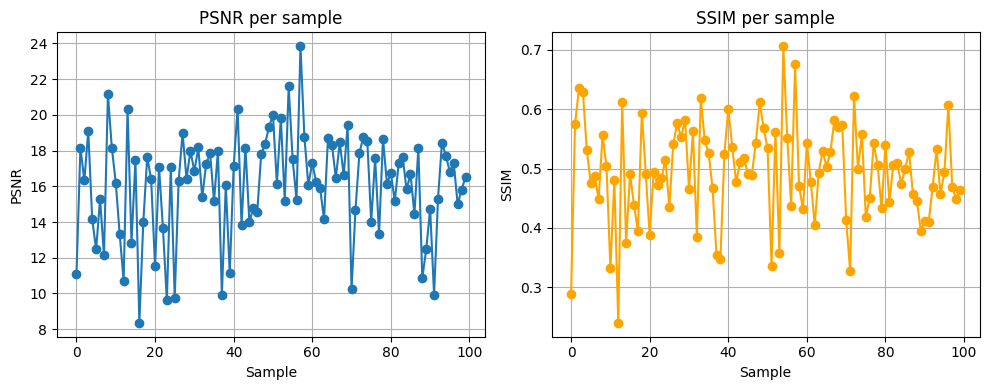

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(psnr_list, marker='o')
plt.title("PSNR per sample")
plt.xlabel("Sample")
plt.ylabel("PSNR")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ssim_list, marker='o', color='orange')
plt.title("SSIM per sample")
plt.xlabel("Sample")
plt.ylabel("SSIM")
plt.grid(True)

plt.tight_layout()
plt.show()


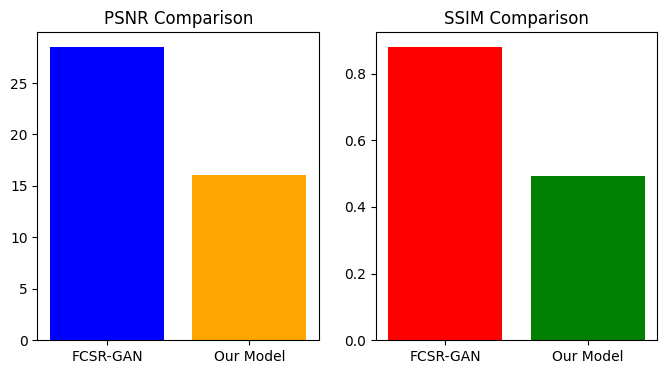

In [25]:
import matplotlib.pyplot as plt

baseline_psnr = 28.50  # from FCSR-GAN paper
baseline_ssim = 0.88

plt.figure(figsize=(8,4))

# PSNR comparison
plt.subplot(1,2,1)
plt.bar(['FCSR-GAN','Our Model'], [baseline_psnr, np.mean(psnr_list)], color=['blue','orange'])
plt.title('PSNR Comparison')

# SSIM comparison
plt.subplot(1,2,2)
plt.bar(['FCSR-GAN','Our Model'], [baseline_ssim, np.mean(ssim_list)], color=['red','green'])
plt.title('SSIM Comparison')

plt.show()

